In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
# Loading the csv
data = pd.read_csv(r'FuelConsumptionCo2.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [9]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
# Exploring the dataset
data.shape

(1067, 13)

In [10]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [14]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# Select the features that we want to consider in predicting values

Here the goal is to predict the value of CO2EMISSIONS from the value of the ENGINESIZE in our dataset

In [17]:
Fuel = data[['ENGINESIZE','CO2EMISSIONS']]
Fuel.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


# Plotting visualizations

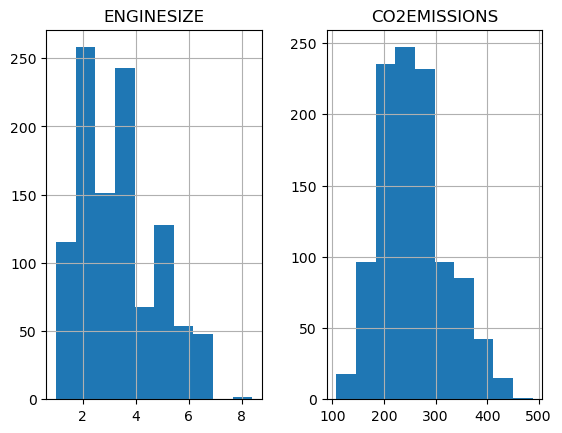

In [18]:
# Histogram
visual = Fuel
visual.hist()
plt.show()

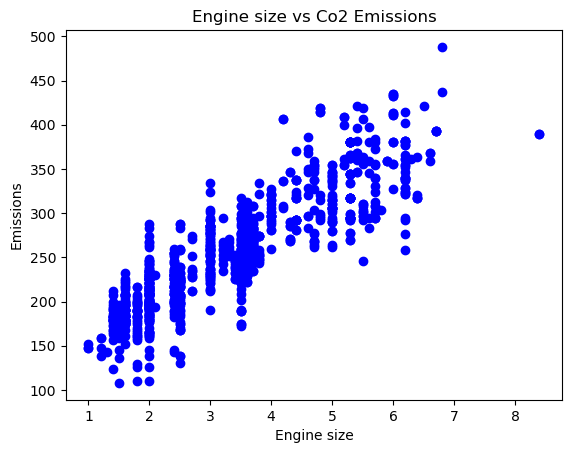

In [19]:
# Scatterplot
plt.scatter(Fuel.ENGINESIZE, Fuel.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.title('Engine size vs Co2 Emissions')
plt.show()

# Creating a Train and Test dataset

In [20]:
#Generating training and testing data... and we are using 80% of the data for training.
train = data[:(int((len(data)*0.8)))]
train

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2014,NISSAN,MAXIMA,MID-SIZE,3.5,6,AV,Z,12.3,9.1,10.9,26,251
849,2014,NISSAN,MURANO AWD,SUV - SMALL,3.5,6,AV,X,13.2,10.1,11.8,24,271
850,2014,NISSAN,NV200 CARGO VAN,SPECIAL PURPOSE VEHICLE,2.0,4,AV,X,10.0,8.5,9.3,30,214
851,2014,NISSAN,PATHFINDER,SUV - SMALL,3.5,6,AV,X,12.0,8.9,10.6,27,244


In [21]:
test = data[:(int((len(data)*0.8))):]
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2014,NISSAN,MAXIMA,MID-SIZE,3.5,6,AV,Z,12.3,9.1,10.9,26,251
849,2014,NISSAN,MURANO AWD,SUV - SMALL,3.5,6,AV,X,13.2,10.1,11.8,24,271
850,2014,NISSAN,NV200 CARGO VAN,SPECIAL PURPOSE VEHICLE,2.0,4,AV,X,10.0,8.5,9.3,30,214
851,2014,NISSAN,PATHFINDER,SUV - SMALL,3.5,6,AV,X,12.0,8.9,10.6,27,244


# Training the model

In [23]:
# We are going to use sklearn to model the data
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients:

print('Coefficient :', regr.coef_)      # Slope
print('Intercept :', regr.intercept_)   # Intercept

Coefficient : [[38.79512384]]
Intercept : [127.16989951]


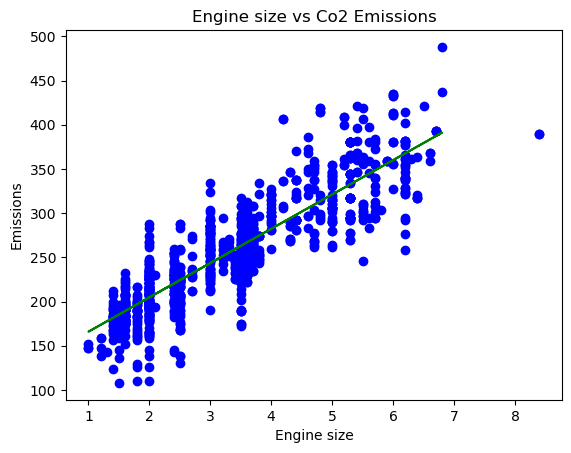

In [25]:
# Plotting the line of best fit
plt.scatter(Fuel.ENGINESIZE, Fuel.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'g')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.title('Engine size vs Co2 Emissions')
plt.show()

# Prediction function

We are going to use a prediction function for our testing dataset.

In [29]:
# Predicting values
# Function for predicting future values
def get_regression_prediction(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Predicting the Co2 Emissions

In [30]:
my_engine_size = 3.2
estimated_emission = get_regression_prediction(my_engine_size,regr.intercept_, regr.coef_)
print('Estimated Emission :', estimated_emission)

Estimated Emission : [[251.31429578]]


# Checking the accuracy for the test data

In [33]:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])    
test_y_ = regr.predict(test_x)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sum of squared Errors (MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print('R2-Score: %.2f' % r2_score(test_y_ , test_y))

Mean Absolute Error: 24.09
Mean Sum of squared Errors (MSE): 997.45
R2-Score: 0.68


MAE: It is the mean of the absolute value of the errors     
MSE: mean of the squared error       
RMSE: R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative.   